<h2><b>[3주차 조별 과제]</b></h2>

<br>

<h3><b>[문제]</b></h3>

<h3>미국 Boston 지역의 집값에 대한 자료입니다. MEDV(집가격, 단위 $1000)가 y변수이며 13개 특성변수로 MEDV를 회귀분석을 통해 예측하고자 하는 모델을 제시하세요. 데이터에 대한 EDA를 진행하고 Visualization을 제시하세요. Linear Regession과 RANSACRegressor도 함께 사용하여, 두 모델을 비교하고 해석하세요. 또한 Elastic Net을 nested cross validation을 적용하여 최선의 모형을 산출하세요.</h3>

<br>

<h3><b>[변수 설명]</b></h3>

````
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s
````
<h3> Categorical 변수: CHAS, RAD </h3>
<h3> CHAS: 경계에 강이 있으면 1, 아니면 0.</h3>
<h3> RAD:높은 값일수록 radial highways에 더 좋은 접근성</h3>

In [ ]:
# dataprep 설치
!pip install dataprep

     |████████████████████████████████| 1.8 MB 15.9 MB/s 
     |████████████████████████████████| 366 kB 54.9 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 1.5 MB 41.4 MB/s 
     |████████████████████████████████| 848 kB 62.4 MB/s 
     |████████████████████████████████| 719 kB 61.5 MB/s 
     |████████████████████████████████| 1.3 MB 72.7 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 10.1 MB 71.7 MB/s 
     |████████████████████████████████| 142 kB 59.0 MB/s 
     |████████████████████████████████| 294 kB 63.3 MB/s 
     |████████████████████████████████| 118 kB 40.2 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 743 kB 60.3 MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=2e74983ba1656867a8f9cb2af56bf7c65056727459d7f9a6

In [ ]:
# The normal imports
import numpy as np # efficient numerical computations
import pandas as pd # data structures for data analysis
from numpy.random import randn

# These are the plotting modules adn libraries
import matplotlib as mpl # plotting (both interactive and to files)
import matplotlib.pyplot as plt
import seaborn as sns # extra plot types, elegant and readable plot style

# machine learning algorithms, dataset access
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RANSACRegressor, ElasticNet

sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 1. EDA&Visualization

In [ ]:
from dataprep.eda import create_report
data_report = create_report(house, title='Data Report')
data_report

## 2. Linear Regression vs RANSAC Regressor

<h2>RANSAC Regressor</h2>


<img src="https://www.researchgate.net/profile/Mehrdad-Heydarzadeh/publication/313472923/figure/fig3/AS:663973812776960@1535315101199/Illustration-of-the-threshold-value-determined-by-RANSAC-algorithm-to-detect-outliers.png" width="600" height="300">

[참고 블로그](https://adioshun.gitbooks.io/pcl/content/ransac.html)

### 1) Simple Linear Regression
<h4>Ransac Regressor가 일반적인 Linear Regression에 비해 outlier에 덜 민감하게 반응</h4>
<h4>Data에 따라 적절한 residual_threshold 설정 필요</h4>

In [ ]:
# Data 
X = house[['RM']].values # 변수 1개만 선택
y = house[['MEDV']].values

# Fit line using all data
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

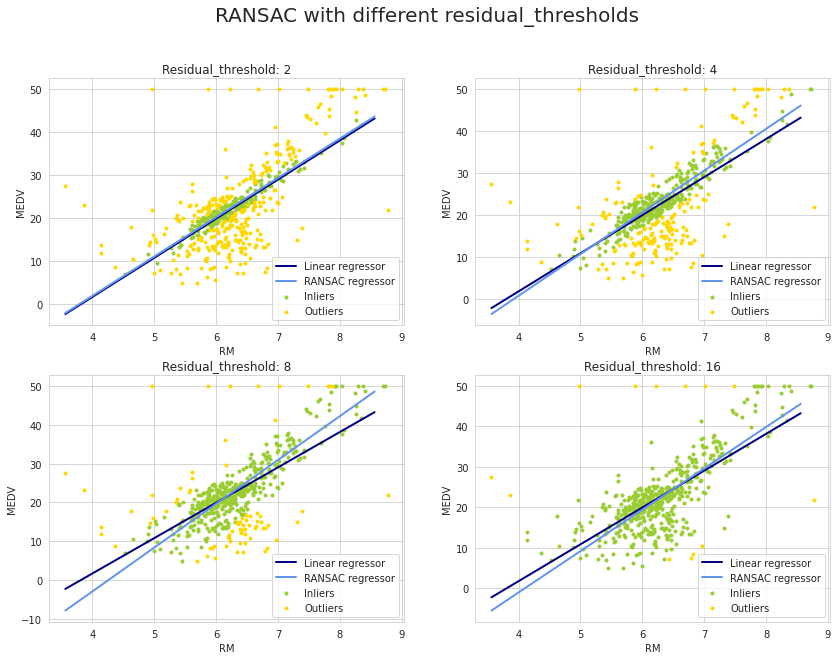

In [ ]:
#  Categorical Data
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

# Residual_threshold list
residual_threshold = [2, 4, 8, 16] 

fig = plt.figure(figsize=(14,10))

for i in range(len(residual_threshold)):
    plt.subplot(a, b, c) # for문 돌면서 차례차례 subplot 그려줌

    # Robustly fit linear model with RANSAC algorithm
    ransac = RANSACRegressor(LinearRegression(), max_trials=1000, min_samples=50,
                                                        residual_threshold=residual_threshold[i], random_state=0)
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)

    # Predict data of estimated models
    line_X = np.arange(X.min(), X.max())[:, np.newaxis]
    line_y = lr.predict(line_X)
    line_y_ransac = ransac.predict(line_X)
    plt.title('Residual_threshold: {}'.format(residual_threshold[i]))
    
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
                label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
                label='Outliers')
    plt.plot(line_X, line_y, color='navy', linewidth=2, label='Linear regressor')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2,
            label='RANSAC regressor')
    plt.legend(loc='lower right')
    plt.xlabel("RM")
    plt.ylabel("MEDV")
    c = c + 1 # subplot 그릴 위치 update

plt.suptitle('RANSAC with different residual_thresholds', fontsize=20)
plt.show()

### 2. Multiple Linear Regression
<h4> Test set에 대해 Ransac의 RMSE가 Linear Regression에 비해 조금 낮음</h4>
<h4> Train set을 학습할 때 outlier들에 민감하게 반응하지 않았기 때문으로 추정</h4>



In [ ]:
house_column = house.columns.to_list()
X = house[house_column[0:-1]]
y = house['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [ ]:
pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
pipe_rs = make_pipeline(StandardScaler(), 
                        RANSACRegressor(LinearRegression(), max_trials=1000, min_samples=50,
                                                    residual_threshold=8, random_state=0))

pipe_lr.fit(X_train, y_train)
pipe_rs.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ransacregressor',
                 RANSACRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                 fit_intercept=True,
                                                                 n_jobs=None,
                                                                 normalize=False),
                                 is_data_valid=None, is_model_valid=None,
                                 loss='absolute_loss', max_skips=inf,
                                 max_trials=1000, min_samples=50,
                                 random_state=0, residual_threshold=8,
                                 stop_n_inliers=inf, stop_probability=0.99,
                                 stop_score=inf))],
         verbose=False)

In [ ]:
# predict prices of X_test
y_pred = pipe_lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("r2_score of Linear Regression: {:.6f}".format(rmse))

# predict prices of X_test
y_pred = pipe_rs.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("r2_score of RANSAC: {:.6f}".format(rmse))

r2_score of Linear Regression: 4.568292
r2_score of RANSAC: 4.510418


## 3. Elastic Net with Nested Cross Validation
<br>

[<h4>참고 블로그</h4>](https://blog.naver.com/PostView.nhn?blogId=winddori2002&logNo=221850530979)

<br>

[<h4>코딩 참고 사이트1</h4>](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/)

<br>

[<h4>코딩 참고 사이트2</h4>](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html)

### 일반적인 K-fold Cross Validation

In [ ]:
house_column = house.columns.to_list()
X = house[house_column[0:-1]].to_numpy()
y = house['MEDV']

# Random State에 따라 RMSE 값 변화 정도가 심함..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=43) 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'elasticnet__l1_ratio': [0.0001, 0.0005, 0.001, 0.05, 0.01, 0.1, 0.5, 1], 'elasticnet__alpha': [10, 1, 0.1, 0.05, 0.025, 0.02, 0.01, 0.001]}] # param_grid for knn

pipe_en = make_pipeline(StandardScaler(), ElasticNet())

grid_search = GridSearchCV(pipe_en, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('elasticnet',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                                                   selection='cyclic',
                           

In [ ]:
grid_search.best_params_

{'elasticnet__alpha': 0.025, 'elasticnet__l1_ratio': 0.1}

In [ ]:
print("best rmse: {}".format(np.sqrt(-grid_search.best_score_))) 

best rmse: 4.979483759881488


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.683562414359017

### Nested K-fold Cross Validation
<h4>평균으로 계산한 RMSE가 앞서 수행한 K-fold Cross Validation보다 높게 나타남</h4>
<h4>Train_test_split에서의 random_sate에 따라 Train set과 Test set 데이터가 변화하기 때문</h4>


Average RMSE on 1th trial: 4.8448 (0.7113)
Average RMSE on 2th trial: 4.8290 (0.5218)
Average RMSE on 3th trial: 4.7752 (0.7013)
Average RMSE on 4th trial: 4.9574 (0.5181)
Average RMSE on 5th trial: 4.7490 (0.7428)
Average RMSE on 6th trial: 4.9253 (0.8369)
Average RMSE on 7th trial: 4.8662 (0.5382)
Average RMSE on 8th trial: 4.8640 (0.6698)
Average RMSE on 9th trial: 4.7850 (0.8290)
Average RMSE on 10th trial: 4.8293 (0.2648)
Average difference of 0.053191 with std. dev. of 0.050829.


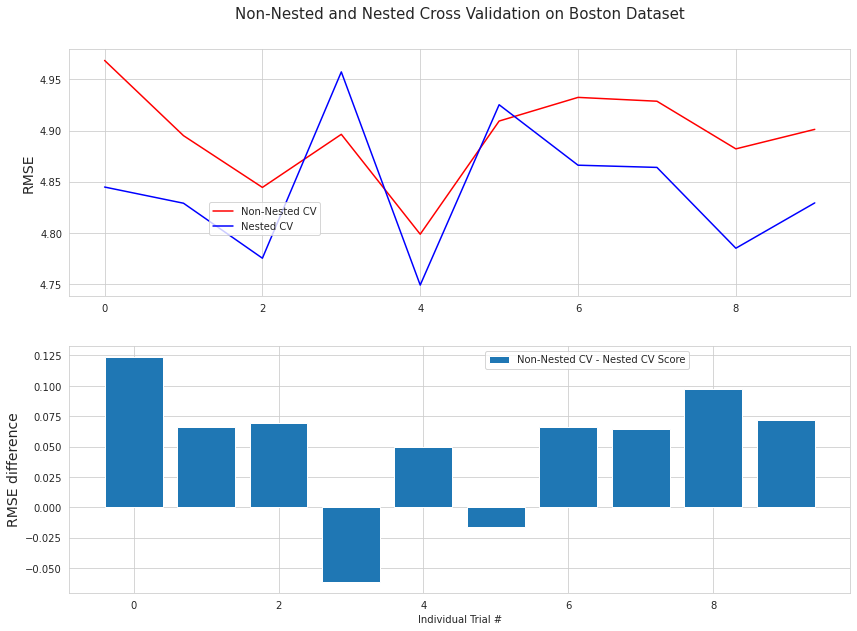

In [ ]:
# Number of random trials
NUM_TRIALS = 10

# Load the dataset
house_column = house.columns.to_list()
X = house[house_column[0:-1]].to_numpy()
y = house['MEDV']

# Set up possible values of parameters to optimize over
param_grid = [{'elasticnet__l1_ratio': [0.0001, 0.0005, 0.001, 0.05], 
               'elasticnet__alpha': [0.1, 0.05, 0.025, 0.02, 0.01]}] # param_grid for elasticnet

# Model
pipe_en = make_pipeline(StandardScaler(), ElasticNet())

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=pipe_en, param_grid=param_grid, scoring='neg_mean_squared_error', cv=inner_cv)
    clf.fit(X, y) 
    non_nested_score = np.sqrt(-clf.best_score_)
    non_nested_scores[i] = np.sqrt(-clf.best_score_) # inner_cv에서 가장 좋은 RMSE 저장?
    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X, y=y, scoring="neg_mean_squared_error", cv=outer_cv)
    nested_score = np.sqrt(-nested_score)
    # print("Individual RMSE on {}th trial:".format(i+1), nested_score)
    # print("Individual RMSE on {}th trial of non_nested:".format(i+1), non_nested_score)
    nested_scores[i] = np.mean(nested_score) # outer_cv에서 RMSE 검증 후 평균을 저장.
    print("Average RMSE on {}th trial: {:.4f} ({:.4f})".format(i+1, np.mean(nested_score), np.std(nested_score)))
    # print("Average RMSE on {}th trial of non-nested: {:.4f} ({:.4f})".format(i+1, np.mean(non_nested_score), np.std(non_nested_score)))


score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
fig = plt.figure(figsize=(14,10))

#plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("RMSE", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Boston Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("RMSE difference", fontsize="14")

plt.show()

In [ ]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the dataset
house_column = house.columns.to_list()
X = house[house_column[0:-1]].to_numpy()
y = house['MEDV']

for i in range(NUM_TRIALS):
    # configure the cross-validation procedure
    cv_outer = KFold(n_splits=5, shuffle=True, random_state=i)

    # enumerate splits
    outer_results = list()
    for train_ix, test_ix in cv_outer.split(X):
        # split data
        X_train, X_test = X[train_ix, :], X[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]
        # configure the cross-validation procedure
        cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
        # define the model
        model = make_pipeline(StandardScaler(), ElasticNet())

        # Set up possible values of parameters to optimize over
        param_grid = [{'elasticnet__l1_ratio': [0.0001, 0.0005, 0.001, 0.05], 
                    'elasticnet__alpha': [0.1, 0.05, 0.025, 0.02, 0.01]}] # param_grid for elasticnet

        # define search
        search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=cv_inner, refit=True)
        # execute search
        result = search.fit(X_train, y_train)
        # get the best performing model fit on the whole training set
        best_model = result.best_estimator_
        # evaluate model on the hold out dataset
        yhat = best_model.predict(X_test)
        # evaluate the model
        rmse = np.sqrt(mean_squared_error(y_test, yhat))
        # store the result
        outer_results.append(rmse)
        # report progress
        # print('>acc=%.4f, est=%.4f, cfg=%s' % (rmse, np.sqrt(-result.best_score_), result.best_params_))
        # summarize the estimated performance of the model
    print('Average RMSE: %.4f (%.4f)' % (mean(outer_results), std(outer_results)))

Average RMSE: 4.8448 (0.7113)
Average RMSE: 4.8290 (0.5218)
Average RMSE: 4.7752 (0.7013)
Average RMSE: 4.9574 (0.5181)
Average RMSE: 4.7490 (0.7428)
Average RMSE: 4.9253 (0.8369)
Average RMSE: 4.8662 (0.5382)
Average RMSE: 4.8640 (0.6698)
Average RMSE: 4.7850 (0.8290)
Average RMSE: 4.8293 (0.2648)
